<a href="https://colab.research.google.com/github/luismoroco/LinearModelForLifeExpectancyPrediction-AI/blob/main/Practica_Calificada_1_IA_Grupo_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Escuela Profesional de Ciencia de la Computación - FIPS**

**Curso :**
Inteligencia Artificial

**Docente :**
Calcina Ccori, Pablo Cesar

**Integrantes :**
- Floes Aguilar, Fabián Vladimir 
- Moroco Ramos, Luis Angel

**Actividad :** Práctica Calificada 1

A partir del siguiente conjunto de datos https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who, crear modelos de regresión lineal para predecir la variable "Life Expectancy" en función de las demás variables.

**Actividades**

1. Explorar visualmente las variables predictoras, utilizando histogramas, matriz de correlación. (3pts)

2. Convertir las variables categóricas en numéricas a fin de poder realizar la regresión (4pts)

3. Utilizar StandardScaler para normalizar las variables (3pts)

4. Utilizar los métodos de Mínimos Cuadrados (LinearRegression), Ransac, Ridge y Lasso, para realizar la predicción y compararlos utilizando las métricas MAE, MSE y RMSE (5pts)

5. En un diagrama de dispersión, graficar la previsión dada por todos los métodos anteriormente mencionados, utilizando diferentes colores (5 pts)

## 1. Explorar visualmente las variables predictoras, utilizando histogramas, matriz de correlación. (3pts)

Seleccionamos el dataset descargado

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 

In [ ]:
lifeExpectancy = pd.read_csv("Life Expectancy Data.csv")

lifeExpectancy.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [ ]:
print(lifeExpectancy.shape)

(2938, 22)


Removiendo caracteristicas que no ayudan en el modelo

In [ ]:
df = lifeExpectancy.drop(["Year", "Status"], axis=1)

In [ ]:
lifeExpectancy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
lifeExpectancy.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [ ]:
lifeExpectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Bloque de histogramas entre todas las ***features***


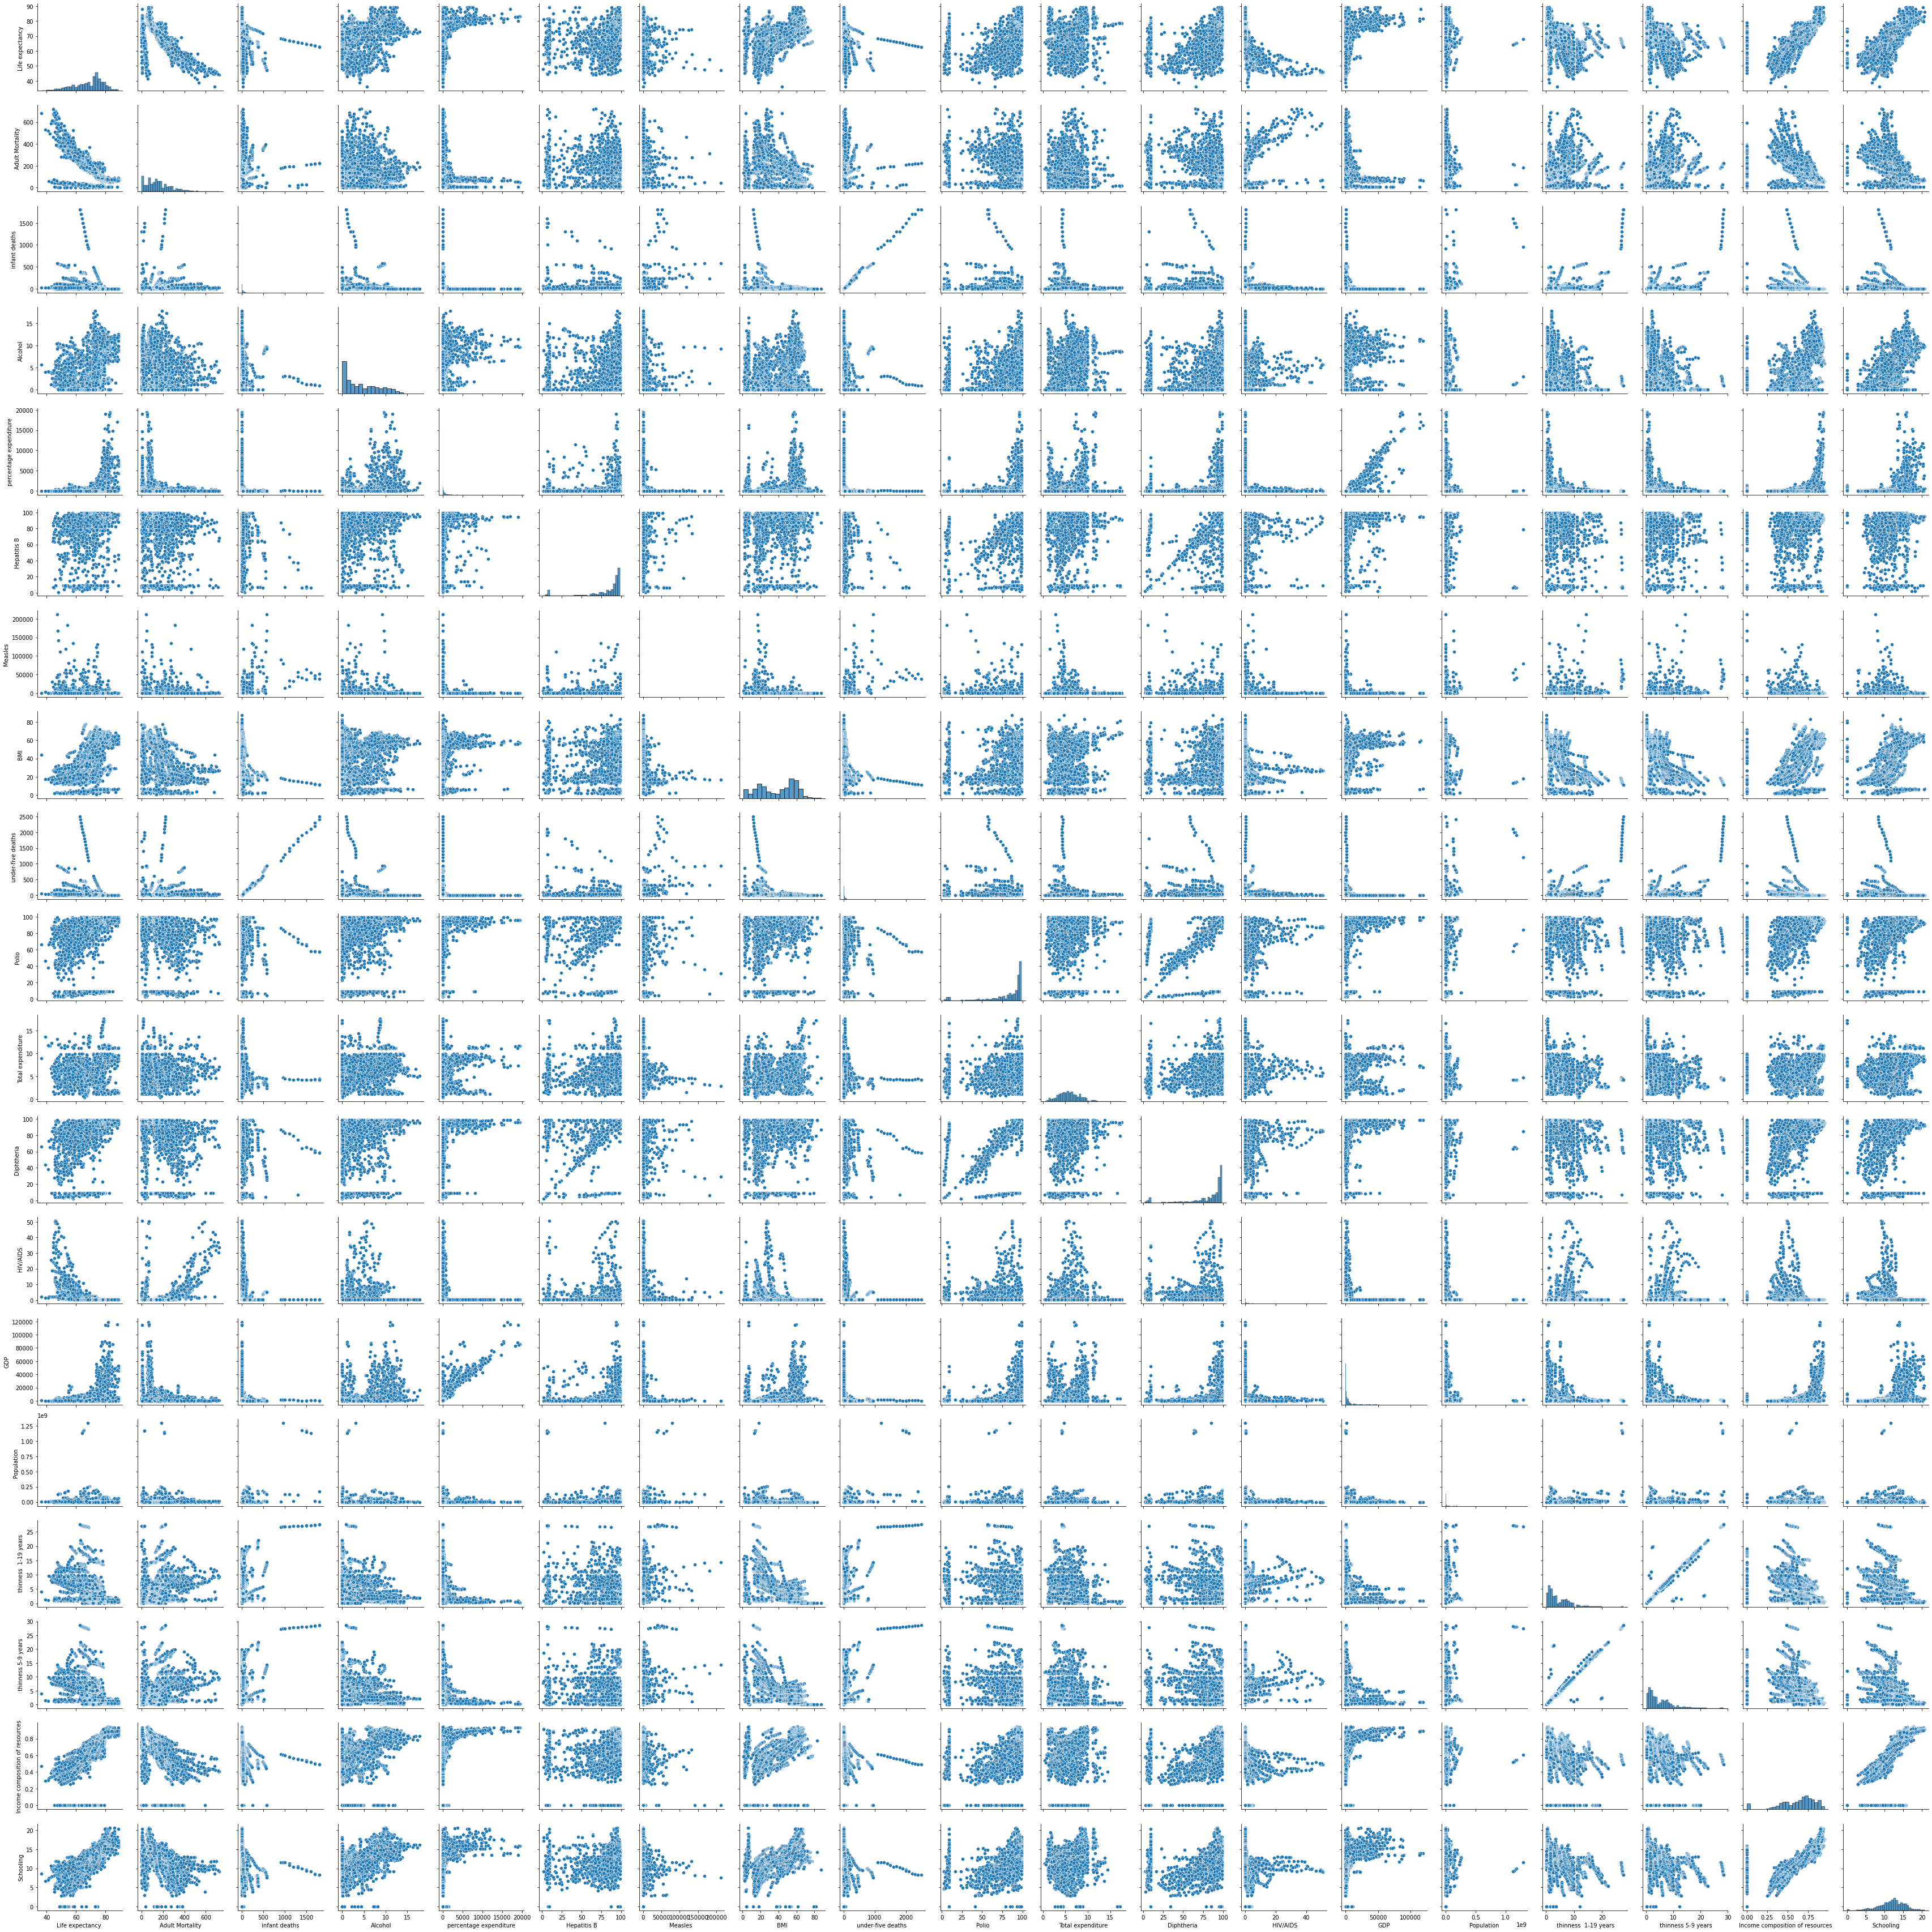

In [ ]:
sns.pairplot(df, height=2.5)
plt.tight_layout()

Matriz de correlación

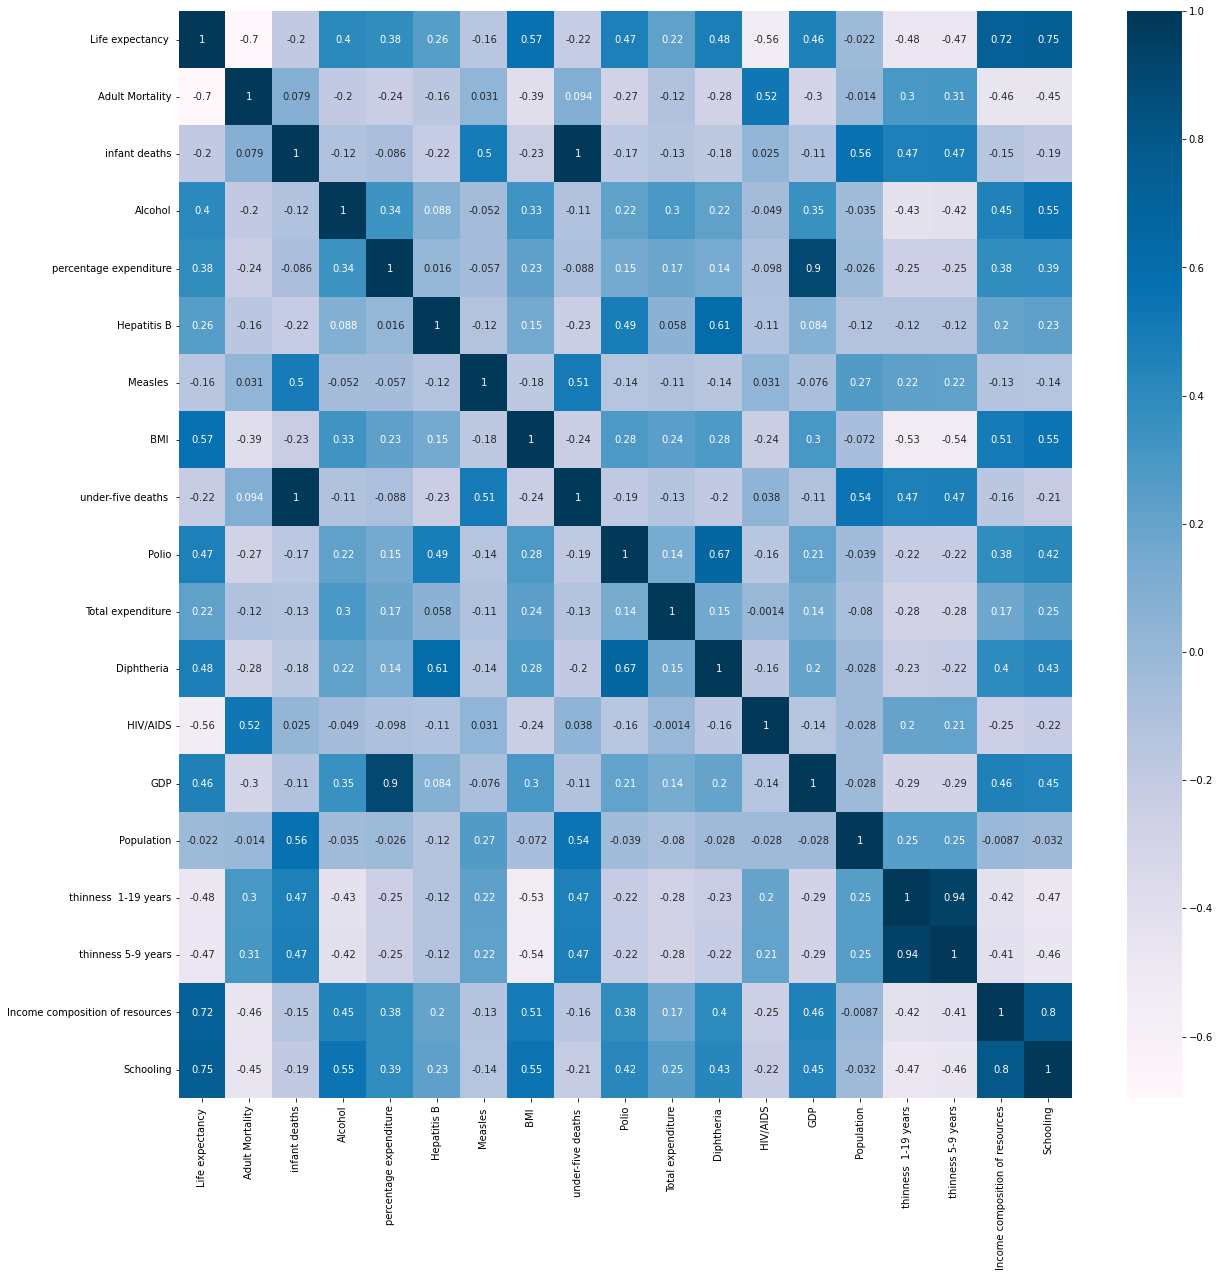

In [ ]:
plt.figure(figsize = (20, 20))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.PuBu)
plt.show()

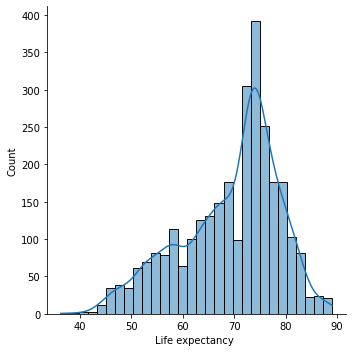

In [ ]:
sns.displot(data=lifeExpectancy["Life expectancy "], kde = True)

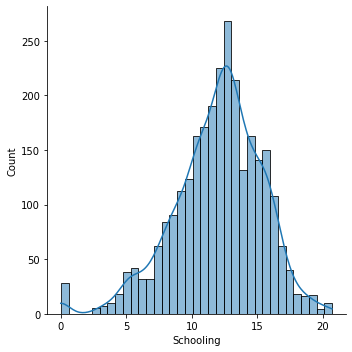

In [ ]:
sns.displot(data=lifeExpectancy["Schooling"], kde = True)

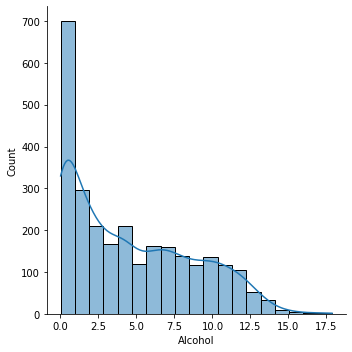

In [ ]:
sns.displot(data=lifeExpectancy["Alcohol"], kde = True)

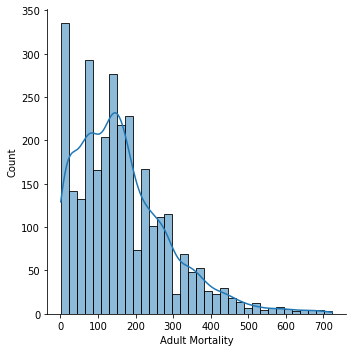

In [ ]:
sns.displot(data=lifeExpectancy["Adult Mortality"], kde = True)

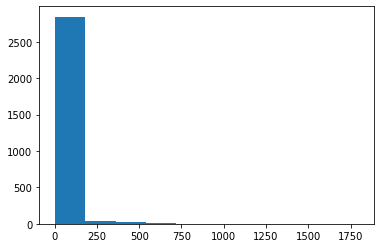

In [ ]:
plt.hist(lifeExpectancy["infant deaths"])
plt.show()

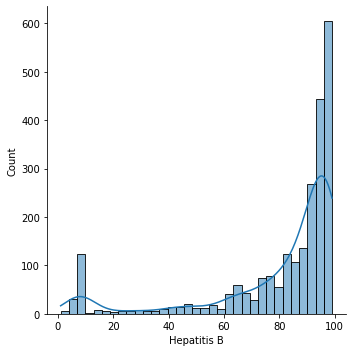

In [ ]:
sns.displot(data=lifeExpectancy["Hepatitis B"], kde = True)

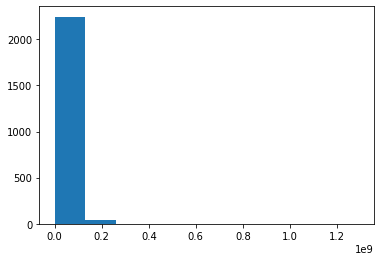

In [ ]:
plt.hist(lifeExpectancy["Population"])
plt.show()

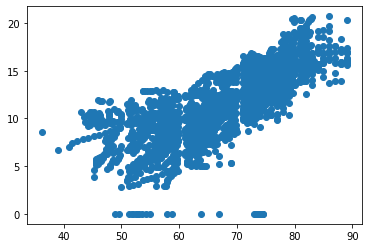

In [ ]:
plt.scatter(lifeExpectancy["Life expectancy "], lifeExpectancy["Schooling"])
plt.show()

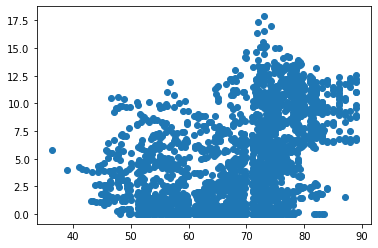

In [ ]:
plt.scatter(lifeExpectancy["Life expectancy "], lifeExpectancy["Alcohol"])
plt.show()

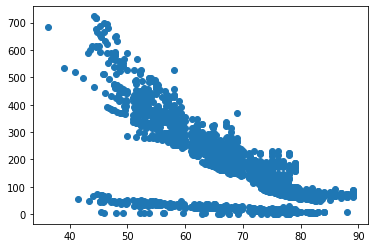

In [ ]:
plt.scatter(lifeExpectancy["Life expectancy "], lifeExpectancy["Adult Mortality"])
plt.show()

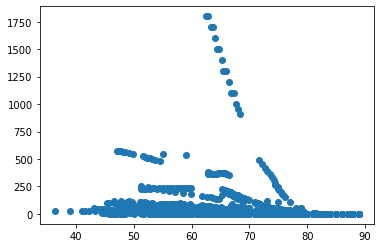

In [ ]:
plt.scatter(lifeExpectancy["Life expectancy "], lifeExpectancy["infant deaths"])
plt.show()

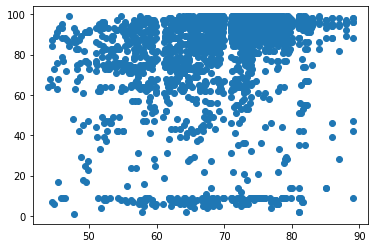

In [ ]:
plt.scatter(lifeExpectancy["Life expectancy "], lifeExpectancy["Hepatitis B"])
plt.show()

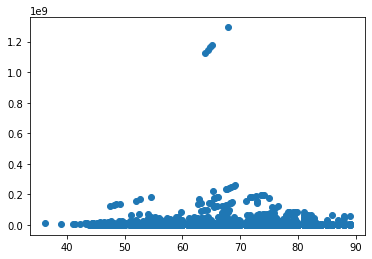

In [ ]:
plt.scatter(lifeExpectancy["Life expectancy "], lifeExpectancy["Population"])
plt.show()

## 2. Convertir las variables categóricas en numéricas a fin de poder realizar la regresión (4pts)

In [ ]:
# Cambiamos a Países por Desarrollar 'Developing' por 0 y a Desarrollados 'Developed' por 1 

lifeExpectancy['Status'].replace(['Developing', 'Developed'], [0, 1], inplace = True)
lifeExpectancy

Country  Year  Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015       0              65.0            263.0   
1     Afghanistan  2014       0              59.9            271.0   
2     Afghanistan  2013       0              59.9            268.0   
3     Afghanistan  2012       0              59.5            272.0   
4     Afghanistan  2011       0              59.2            275.0   
...           ...   ...     ...               ...              ...   
2933     Zimbabwe  2004       0              44.3            723.0   
2934     Zimbabwe  2003       0              44.5            715.0   
2935     Zimbabwe  2002       0              44.8             73.0   
2936     Zimbabwe  2001       0              45.3            686.0   
2937     Zimbabwe  2000       0              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427   

In [ ]:
# BMI - Función de Clasificación 
# El índice de Masa Corporal tiene parámetros, y los aplicamos para hacer más entendible el dataset

def applyCategoria(x):
  if x < 18.5: 
    return 0
  elif x >= 18.5 and x <= 24.9:
    return 1
  elif x >= 25.0 and x <= 29.9:
    return 2
  elif x >= 30.0 and x <= 39.9:
    return 3
  elif x >= 35.5 and x <= 39.9:
    return 4
  else:
    return 5

# Aplicando la función 

lifeExpectancy[' BMI '] = lifeExpectancy[' BMI '].apply(lambda x: applyCategoria(x))

In [ ]:
# Remover los datos NaN del dataset 

# Remover NaN de Life expectancy  
lifeExpectancy['Life expectancy '].fillna(lifeExpectancy['Life expectancy '].mean(), inplace = True)

# Remover NaN de Adult Mortality  
lifeExpectancy['Adult Mortality'].fillna(lifeExpectancy['Adult Mortality'].mean(), inplace = True)

# Remover NaN de Alcohol 
lifeExpectancy['Alcohol'].fillna(lifeExpectancy['Alcohol'].median(), inplace = True)
                                 
# Remover NaN de Hepatitis B  
lifeExpectancy['Hepatitis B'].fillna(lifeExpectancy['Hepatitis B'].mean(), inplace = True)
                               
# Remover NaN de Polio      
lifeExpectancy['Polio'].fillna(lifeExpectancy['Polio'].mean(), inplace = True)

# Remover NaN de Total expenditure        
expenditure_avg = lifeExpectancy['Total expenditure'].mean()
expenditure_std = lifeExpectancy['Total expenditure'].std()

expenditure_null_random_list = np.random.randint(expenditure_avg - expenditure_std, expenditure_avg + expenditure_std)

lifeExpectancy.loc[np.isnan(lifeExpectancy['Total expenditure']), 'Total expenditure'] = expenditure_null_random_list
lifeExpectancy['Total expenditure'] = lifeExpectancy['Total expenditure'].astype(int)

# Remover NaN de 'Diptheria'
lifeExpectancy['Diphtheria '].fillna(lifeExpectancy['Diphtheria '].mean(), inplace = True)

# Remover NaN de 'Polio'
lifeExpectancy['Polio'].fillna(lifeExpectancy['Polio'].mean(), inplace = True)

# Remover NaN de 'Total Expenditure'
lifeExpectancy['Total expenditure'].fillna(lifeExpectancy['Total expenditure'].mean(), inplace = True)


# Remover NaN de GDP
# lifeExpectancy['GDP'] = lifeExpectancy['GDP'].fillna(lifeExpectancy['GDP'].mean(), inplace = True)

# Remover NaN de Population 
# lifeExpectancy['Population'] = lifeExpectancy['Population'].fillna(lifeExpectancy['Population'].mean(), inplace = True)



# Remover NaN de thinness  1-19 years 
lifeExpectancy[' thinness  1-19 years'].fillna(lifeExpectancy[' thinness  1-19 years'].mean(), inplace = True)

# Remover NaN de thinness 5-9 years
lifeExpectancy[' thinness 5-9 years'].fillna(lifeExpectancy[' thinness 5-9 years'].mean(), inplace = True)

# Remover NaN de Income composition of resources
lifeExpectancy['Income composition of resources'].fillna(lifeExpectancy['Income composition of resources'].mean(), inplace = True)

# Remover NaN de Schooling
lifeExpectancy['Schooling'].fillna(lifeExpectancy['Schooling'].mean(), inplace = True)


In [ ]:
del lifeExpectancy['Country']
del lifeExpectancy['Year']

In [ ]:
# Función para limpiar el dataset de valores NaN, inf y -inf para verificar que el dataset esté limpio, se puede
# ejecutar el siguiente comando :"lifeExpectancy.isnull().sum()" o " lifeExpectancy.isnull().sum().sum()" el cual debe devolver todo 0

def clean_dataset(df):
     assert isinstance(df, pd.DataFrame), "df"
     df.dropna(inplace=True)
     #Verifica si los valores nan, inf y -inf estan incluidos en el dataframe 
     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
     return df[indices_to_keep].astype(np.float64)
clean_dataset(lifeExpectancy)

Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0        0.0              65.0            263.0           62.0     0.01   
1        0.0              59.9            271.0           64.0     0.01   
2        0.0              59.9            268.0           66.0     0.01   
3        0.0              59.5            272.0           69.0     0.01   
4        0.0              59.2            275.0           71.0     0.01   
...      ...               ...              ...            ...      ...   
2933     0.0              44.3            723.0           27.0     4.36   
2934     0.0              44.5            715.0           26.0     4.06   
2935     0.0              44.8             73.0           25.0     4.43   
2936     0.0              45.3            686.0           25.0     1.72   
2937     0.0              46.0            665.0           24.0     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0    1154.0    1.0   
1                  73.523582         62.0     492.0    1.0   
2                  73.219243         64.0     430.0    0.0   
3                  78.184215         67.0    2787.0    0.0   
4                   7.097109         68.0    3013.0    0.0   
...                      ...          ...       ...    ...   
2933                0.000000         68.0      31.0    2.0   
2934                0.000000          7.0     998.0    2.0   
2935                0.000000         73.0     304.0    2.0   
2936                0.000000         76.0     529.0    2.0   
2937                0.000000         79.0    1483.0    2.0   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                   83.0    6.0                8.0         65.0        0.1   
1                   86.0   58.0                8.0         62.0        0.1   
2                   89.0   62.0                8.0         64.0        0.1   
3                   93.0   67.0                8.0         67.0        0.1   
4                   97.0   68.0                7.0         68.0        0.1   
...                  ...    ...                ...          ...        ...   
2933                42.0   67.0                7.0         65.0       33.6   
2934                41.0    7.0                6.0         68.0       36.7   
2935                40.0   73.0                6.0         71.0       39.8   
2936                39.0   76.0                6.0         75.0       42.1   
2937                39.0   78.0                7.0         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0     584.259210  33736494.0                   17.2                 17.3   
1     612.696514    327582.0                   17.5                 17.5   
2     631.744976  31731688.0                   17.7                 17.7   
3     669.959000   3696958.0                   17.9                 18.0   
4      63.537231   2978599.0                   18.2                 18.2   
...          ...         ...                    ...                  ...   
2933  454.366654  12777511.0                    9.4                  9.4   
2934  453.351155  12633897.0                    9.8                  9.9   
2935   57.348340    125525.0                    1.2                  1.3   
2936  548.587312  12366165.0                    1.6                  1.7   
2937  547.358878  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  


In [ ]:
lifeExpectancy.isnull().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## 3. Utilizar StandardScaler para normalizar las variables (3pts)

Usaremos Pipeline from sklearn para este proceso

In [ ]:
# Usaremos Shuffle para alterar el orden de las columnas porque el dataset traía 
# los datos agrupados por países en orden

from sklearn.utils import shuffle

lifeExpectancy = shuffle(lifeExpectancy)

In [ ]:
# Asignamos todo el DF a X a excepción de 'Life Expectancy', la variable objetivo.

from sklearn.model_selection import train_test_split

X = lifeExpectancy.drop("Life expectancy ", axis = 1)

y = lifeExpectancy['Life expectancy ']

# El conjunto de entrenamiento 'Train' será de 75% y 'Test' de 25%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [ ]:
# Escalamos las variables predictoras X en Train y Test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 4. Utilizar los métodos de Mínimos Cuadrados (LinearRegression), Ransac, Ridge y Lasso, para realizar la predicción y compararlos utilizando las métricas MAE, MSE y RMSE (5pts)

In [ ]:
# Ahora tenemos un DF fácil de leer con filas completamente aleatorias

lifeExpectancy.head()

Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
1697       0              75.0            126.0             52     4.86   
1144       0              73.4            157.0              4     3.08   
1277       0              81.0             69.0              1     2.23   
1468       0              73.9             11.0              1     1.94   
2368       0              68.0            193.0              0     1.09   

      percentage expenditure  Hepatitis B  Measles    BMI   \
1697               13.311095         97.0         3      5   
1144              286.121145         97.0         0      5   
1277             1895.342792         99.0       116      0   
1468              630.054072         77.0       618      0   
2368               19.749292         89.0         0      5   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
1697                  62   97.0                  5         97.0        0.1   
1144                   5   97.0                  8         97.0        0.5   
1277                   1   95.0                  7         95.0        0.1   
1468                   1   74.0                  8         77.0        0.1   
2368                   0   94.0                  5         89.0        0.1   

               GDP  Population   thinness  1-19 years   thinness 5-9 years  \
1697    731.378864    136768.0                    1.9                  1.9   
1144   1815.489496     83521.0                    2.3                  2.2   
1277  19888.172000       689.0                    1.1                  1.1   
1468   5339.441291   3986852.0                    4.7                  4.6   
2368    125.791670     54477.0                    1.2                  1.2   

      Income composition of resources  Schooling  
1697                            0.700       11.6  
1144                            0.603       11.3  
1277                            0.863       15.9  
1468                            0.000       13.7  
2368                            0.489        9.2

Metricas MAE, MSE y RMSE

In [ ]:
# Importamos las funciones para obtener las métricas

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def calculate_metrics(y_test, y_pred):  
    mae = mean_absolute_error(y_test, y_pred)   
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    return mae, mse, rmse, r2_scors 

def evaluateMetrics(xModel):
    predic1 = xModel.predict(X_test)
    predic2 = xModel.predict(X_train)
    calculate_metrics(y_test, predic1)
    calculate_metrics(y_train, predic2)
    return predic1, predic2


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression(
    fit_intercept = True
)

linear.fit(X_train, y_train) 

LinearRegression()

In [ ]:
predTestLin, predTrainLin = evaluateMetrics(linear)

**Ransac Regression**

In [ ]:
from locale import normalize
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(
    base_estimator = LinearRegression(), min_samples = 50, 
    max_trials=100000, random_state = 42, residual_threshold = 50
)

ransac.fit(X_train, y_train)

RANSACRegressor(base_estimator=LinearRegression(), max_trials=100000,
                min_samples=50, random_state=42, residual_threshold=50)

In [ ]:
predTestRan, predTrainRan = evaluateMetrics(ransac)

**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(
    alpha = 100, solver = 'auto',
    tol = 0.0001, random_state = 42
)

ridge.fit(X_train, y_train)

Ridge(alpha=100, random_state=42, tol=0.0001)

In [ ]:
predTestRid, predTrainRid = evaluateMetrics(ridge)

**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(
    alpha = 0.01, fit_intercept = True,
    random_state = 42
)

lasso.fit(X_train, y_train)

Lasso(alpha=0.01, random_state=42)

In [ ]:
predTestLass, predTrainLass = evaluateMetrics(lasso)

## 5. En un diagrama de dispersión, graficar la previsión dada por todos los métodos anteriormente mencionados, utilizando diferentes colores (5 pts)

**Predicciones de los modelos**

**Regresión Lineal**

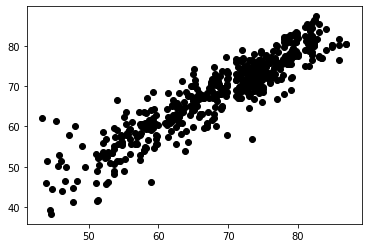

In [ ]:
plt.scatter(
    y_test, predTestLin,
    edgecolors = 'face',
    color = 'black'
)

**Regresión RANSAC**

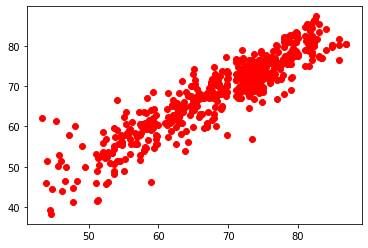

In [ ]:
plt.scatter(
    y_test, predTestRan,
    edgecolors = 'face',
    color = 'red'
)

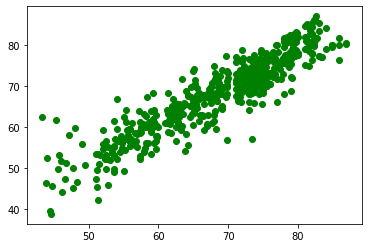

In [ ]:
plt.scatter(
    y_test, predTestRid,
    edgecolors = 'face',
    color = 'green'
)

**Regresión Lasso**

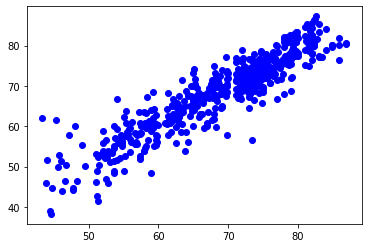

In [ ]:
plt.scatter(
    y_test, predTestLass,
    edgecolors = 'face',
    color = 'blue'
)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Crearemos un DF incicial con las métricas de la Regresión Lineal
# Luego agregaremos RANSAC, RI

results_df = pd.DataFrame(data=[["Linear Regression", *calculate_metrics(y_test, predTestLin)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

result_df_ran = pd.DataFrame(data=[["Ransac Regression", *calculate_metrics(y_test, predTestRan)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

result_df_rid = pd.DataFrame(data=[["Ridge Regression", *calculate_metrics(y_test, predTestRid)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

result_df_las = pd.DataFrame(data=[["Lasso Regression", *calculate_metrics(y_test, predTestLass)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])


results_df = results_df.append(result_df_ran, ignore_index = True)
results_df = results_df.append(result_df_rid, ignore_index = True)
results_df = results_df.append(result_df_las, ignore_index = True)

results_df

Model       MAE        MSE      RMSE  R2 Square
0  Linear Regression  2.886063  15.490220  3.935762   0.838746
1  Ransac Regression  2.886494  15.497213  3.936650   0.838673
2   Ridge Regression  3.000315  16.206855  4.025774   0.831285
3   Lasso Regression  2.916894  15.676388  3.959342   0.836808

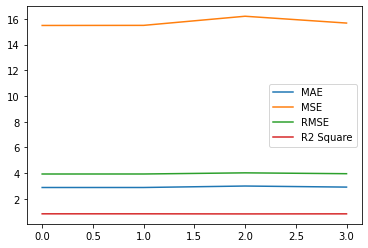

In [ ]:
# Plotearemos las métricas

results_df.plot()